# Remove Nth Node From End of List
* [Link](https://leetcode.com/problems/remove-nth-node-from-end-of-list/description/)

# My Approach

### Class 정의하기: `Linked List`

In [1]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

### Linked List 하나 만들어보기
* `[1 -> 2 -> 3 -> 4 -> 5]`

In [4]:
head = ListNode(1)
curr_node = head

for i in range(4):
    curr_node.next = ListNode(i + 2)
    curr_node = curr_node.next

node = head

message = 'START'
while node:
    message += f' -> {node.val}'
    node = node.next
print(message)

START -> 1 -> 2 -> 3 -> 4 -> 5


### 문제를 풀어보자!

In [5]:
class Solution:
    def removeNthFromEnd(self, head: ListNode, n: int) -> ListNode:
        
        # 먼저 각 노드 객체를 담을 리스트를 준비했어요.
        nodes_list = []

        # Linked List의 head 객체를 없애야 할 수도 있으므로, 다음과 같이 fake_head를 연결해줘요. (사진 1 참고)
        fake_head = ListNode(None, head)

        # 각 노드 객체를 리스트에 담아주기 시작! (fake_head는 스킵)
        curr_node = fake_head
        while curr_node:
            nodes_list.append(curr_node) # 담아줘
            curr_node = curr_node.next # 다음 노드로 이동해줘

        # 뒤에서 N번째 노드를 Linked List에서 삭제해줘요. (사진 2 참고)
        n_minus_1_node = nodes_list[-n - 1]
        n_minus_1_node.next = n_minus_1_node.next.next

        # fake_head를 다시 떼어준 원래 head 객체를 반환해요.
        return fake_head.next

##### 사진 1: `fake_node`의 의미
* 어떤 node를 지우려면, previous node의 `.next` property를 통해 지워야 해요.
* 그런데, head에는 previous node가 없잖아요. 그래서 fake_node를 임시로 붙여주는 것이죠.

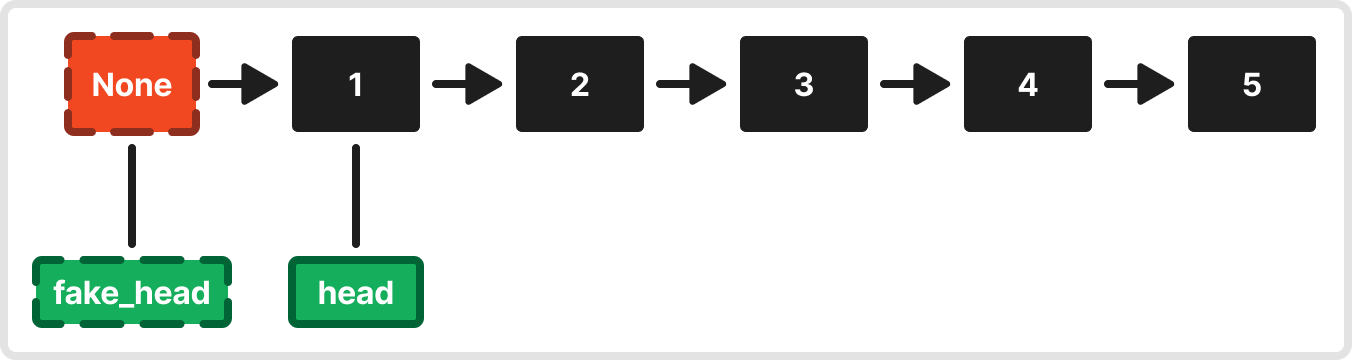

##### 사진 2: 뒤에서 `N번째` 노드를 Linked List에서 삭제하는 방법
* **기존**: n-1 노드의 .next가 n 노드였어요.
* **변경**: n-1 노드의 .next를 n+1 노드로 바꾸기만 하면 돼요.
    > `nodes_list[-n - 1].next = nodes_list[-n - 1].next.next`

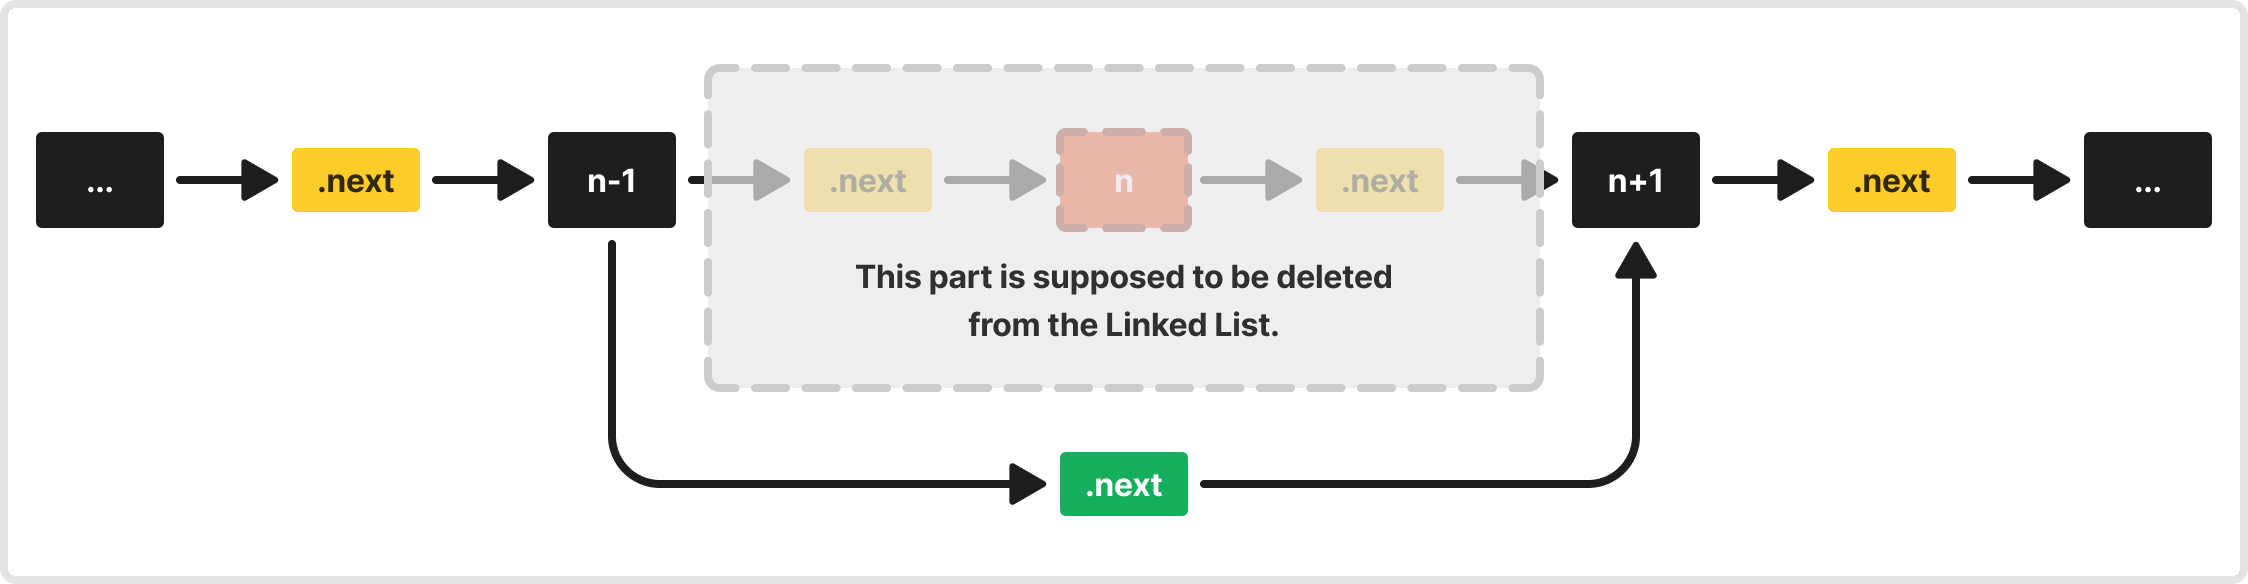

### 아까 만든 Linked List로 함수 실행해보자!
* **원래**: `[1 -> 2 -> 3 -> 4 -> 5]`
* **적용 후**: `[1 -> 2 -> 3 -> 4]`

In [6]:
node = Solution.removeNthFromEnd(Solution, head, 1)

i = 0
while node:
    if i == 0:        
        message = f'{node.val}'
    else:
        message += f' -> {node.val}'
    node = node.next
    i += 1
print(message)

1 -> 2 -> 3 -> 4
